This is the code used to produce the data for step 1 of WorldQuant University
MScFE 560 FINANCIAL MARKETS Group Work Project # 1.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
#Selected tickers
tickers = ['JNJ', 'T', 'PG']
weights = {'JNJ' : 0.40, 'T': 0.30, 'PG': 0.30}

In [3]:
data = {}

In [4]:
#Date Range for data retrieval
START_DATE = '2022-04-28'
END_DATE = '2024-04-28'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


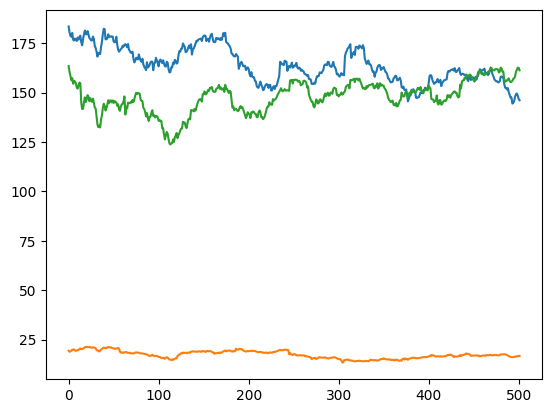

In [5]:
#Fetching the data
weekly_returns = {}
for ticker in tickers:
    df = yf.download(ticker, start=START_DATE, end=END_DATE)
    close_prices = np.array(df['Close'])
    ax = plt.subplot()
    ax.plot(close_prices)
    weekly_returns[ticker] = close_prices[1:] / close_prices[:-1] - 1
weekly_returns['Portfolio'] = np.zeros_like(weekly_returns[tickers[0]])
for ticker in tickers:
    weekly_returns['Portfolio'] += weights[ticker] * weekly_returns[ticker]
weekly_returns_df = pd.DataFrame(weekly_returns)



In [6]:
output_df = pd.DataFrame()
columns = ['JNJ', 'T', 'PG', 'Portfolio']
index = ['Average Returns', 'Standard Deviation', 'Skewness', 'Kurtosis']
output_df = pd.DataFrame(index=index, columns=columns)
for column in columns:
    output_df.loc['Average Returns', column] = weekly_returns_df[column].mean()
    output_df.loc['Standard Deviation', column] = weekly_returns_df[column].std()
    output_df.loc['Skewness', column] = weekly_returns_df[column].skew()
    output_df.loc['Kurtosis', column] = weekly_returns_df[column].kurtosis()

In [7]:
#Summary statistics for the portfolio
output_df.describe()

,JNJ,T,PG,Portfolio
count,4.000000,4.000000,4.000000,4.000000
unique,4.000000,4.000000,4.000000,4.000000
top,-0.000404,-0.000162,0.000036,-0.000199
freq,1.000000,1.000000,1.000000,1.000000


In [8]:
#Calculating the correlation among assets
correlation_matrix = output_df.corr()
correlation_matrix

,JNJ,T,PG,Portfolio
JNJ,1.000000,0.997099,0.984691,0.994590
T,0.997099,1.000000,0.995103,0.999578
PG,0.984691,0.995103,1.000000,0.997399
Portfolio,0.994590,0.999578,0.997399,1.000000


In [9]:
#Calculating the covariance among assets
covariance_matrix = output_df.cov()
covariance_matrix

,JNJ,T,PG,Portfolio
JNJ,3.669554,6.856594,4.209463,0.632994
T,6.856594,12.886273,7.971711,1.192144
PG,4.209463,7.971711,4.980124,0.739499
Portfolio,0.632994,1.192144,0.739499,0.110382


# Visualizing the distribution of daily returns

1. JNJ: Johnson & Johnson

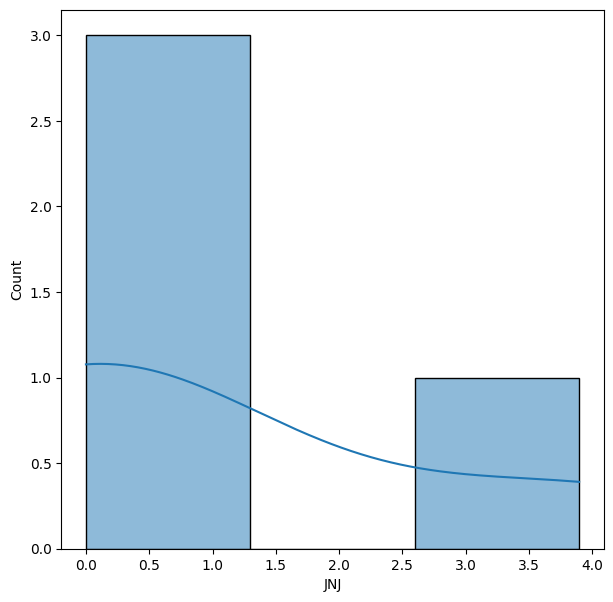

In [10]:
plt.figure(figsize=(7,7))
sns.histplot(output_df.JNJ, kde=True);

2. T: AT&T Inc.

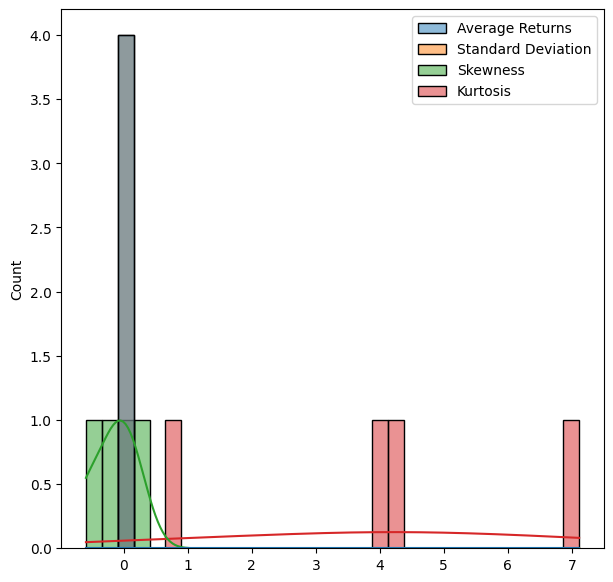

In [11]:
plt.figure(figsize=(7,7))
sns.histplot(output_df.T, kde=True);

3. PG: Procter & Gamble Company

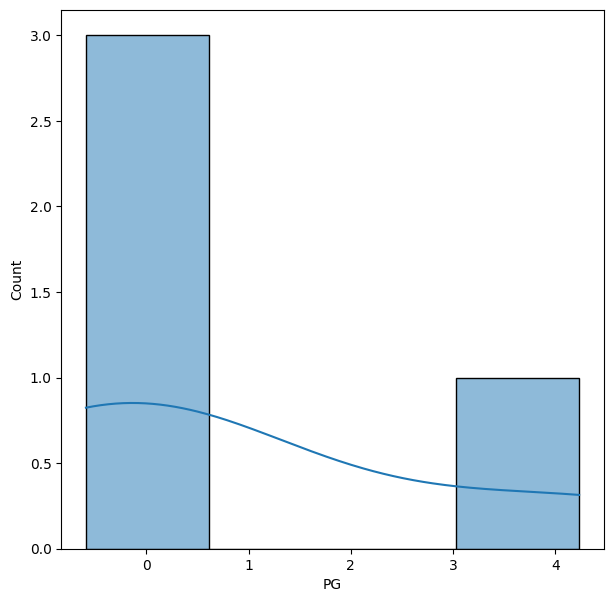

In [12]:
plt.figure(figsize=(7,7))
sns.histplot(output_df.PG, kde=True);

# Calculating Portfolio's Statistics

In [13]:
#Choosing weights for the portfolio
weights = [0.40, 0.30, 0.30]

In [14]:
#Calculating the Portfolio's return
output_df['Portfolio'] = output_df['JNJ'] * weights[0] + output_df['T'] * weights[1] + output_df['PG'] * weights[2]

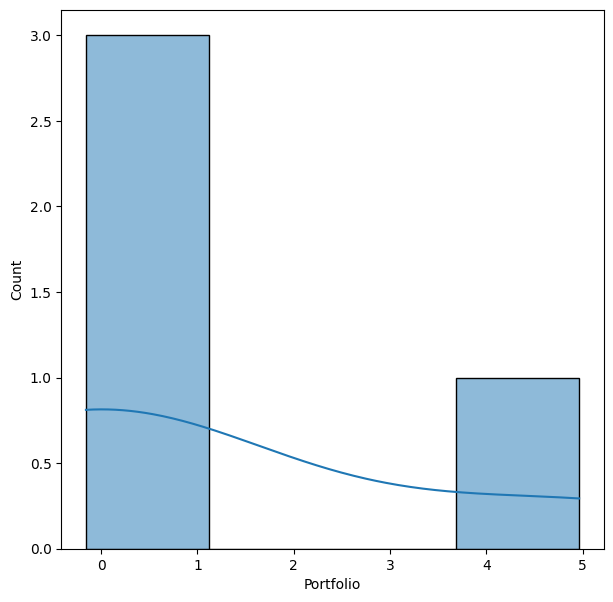

In [15]:
#Visualizing the Portfolio's distribution of returns
plt.figure(figsize=(7,7))
sns.histplot(output_df.Portfolio, kde=True);

# Saving data offline

In [16]:
#Saving data offline from the fetched data
output_df.to_csv('JNJ_T_PG.csv', index=False)
#saving a copy of correlation matrix
correlation_matrix.to_csv('correlation_matrix.csv', index=False)
#saving a copy of covariance matrix
covariance_matrix.to_csv('covariance_matrix.csv', index=False)
#saving a copy of the portfolio metrics
output_df.to_csv('portfolio_metrics.csv', index=False)